In [1]:
# the rest of the imports require the location to be the base of the repo 
#   i.e., SARS-CoV-2-network-analysis)
# run this first if needed to get to the right directory
import os
os.chdir('../../')
# os.chdir('/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis')
os.getcwd()

'/data/jeff-law/projects/2020-03-covid-19/SARS-CoV-2-network-analysis-branch'

In [2]:
from collections import defaultdict
import argparse
import os, sys
from tqdm import tqdm
import itertools
#import utils.file_utils as utils
# also compute the significance of sinksource vs local
#from scipy.stats import kruskal, mannwhitneyu
# plotting imports
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
print("python version: %s" % (sys.version.split('\n')[0]))
print("matplotlib version: %s" % matplotlib.__version__)
print("seaborn version: %s" % sns.__version__)
print("pandas version: %s" % pd.__version__)
print("numpy version: %s" % (np.__version__))
# make this the default for now
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.2)
# my local imports
# fss_dir = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))
# sys.path.insert(0,fss_dir)
from src.annotation_prediction.src.plot import plot_utils
from src.annotation_prediction.src.algorithms import runner
from src.annotation_prediction.src.evaluate import cross_validation as cv


%matplotlib inline  

python version: 3.7.7 (default, Mar 13 2020, 13:32:22) 
matplotlib version: 3.2.1
seaborn version: 0.10.0
pandas version: 1.0.3
numpy version: 1.18.2


# CV Plots

Here is some code to generate the CV plots

In [117]:
def load_alg_results(neg_factor=1, measures=['auroc', 'auprc', 'eprec-rec0.3']):
    df_all = pd.DataFrame()
    print(config_file)
    config_map = plot_utils.load_config_file(config_file)
    # for neg_factor in [5, 10]:
    for alg in algs:
        kwargs = {'algs': [alg], 'measures': measures, #'ratio_over_random': True,
                  'cross_validation_folds': 5, 'sample_neg_examples_factor': neg_factor}
        input_settings, alg_settings, output_settings, out_pref, kwargs = plot_utils.setup_variables(
                config_map, '', **kwargs)
        print(kwargs)
        kwargs['postfix'] = postfix

        df = plot_utils.load_all_results(input_settings, alg_settings, output_settings, **kwargs)
    #     df.rename(columns={'Algorithm': 'param_val'}, inplace=True)
        df['neg_factor'] = neg_factor
        df_all = pd.concat([df_all, df])

    if kwargs.get('ratio_over_random'):
        kwargs['measures'] = [m+'-ratio' for m in kwargs['measures']]
    plot_utils.results_overview(df_all, measures=kwargs['measures'])
    df_all.head()

    # rename the measures
    df_all['plot_exp_name'] = df_all['plot_exp_name'].replace("STRING-400", 'STRING')
    df_all.drop(columns=['avgp', 'fmax', 'eprec-reck1'], inplace=True)

    df2 = df_all.melt(id_vars=['Algorithm', 'plot_exp_name', 'neg_factor'], value_vars=kwargs['measures'], var_name='measure')
    df2['measure'] = df2['measure'].replace("fmax-ratio", r"F$_{\mathrm{max}}$") \
                                   .replace('eprec-rec0.3-ratio', "Early Precision (0.3 Recall)") \
                                   .replace('eprec-rec0.3', "Early Precision (0.3 Recall)") \
                                   .replace('auprc-ratio', "AUPRC") \
                                   .replace('auprc', "AUPRC") \
                                   .replace('auroc', 'AUROC')
    measures = ['AUROC', 'AUPRC', 'Early Precision (0.3 Recall)']
    # hue_order = ['']

    # now combine the name and measure column
    df2['exp_name'] = df2['measure'] + ' P:N 1:' + df2['neg_factor'].astype(str)
    # df2.sort_values('exp_name', inplace=True)
    return df_all, df2

In [86]:
config_file = "ann_pred_inputs/config_files/stringv11/string-combined-and-deepnf.yaml"
# out_file = "outputs/viz/params-testing/string-tissuenet-ace2-cv5-nf5-nr100.pdf"
neg_factor = 1
# neg_factor = 5
# neg_factor = 10
postfix = ""
out_file = "outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf%s.pdf" % (neg_factor)
os.makedirs(os.path.dirname(out_file), exist_ok=True)
algs = ['rl', 'rwr', 'genemania', 'sinksourceplus', 'deepnf', 'svm', 'logistic_regression', 'localplus']

### Plot all neg_factors 

fss_inputs/config_files/stringv11-wace2/string-combined-and-deepnf.yaml
{'algs': ['genemaniaplus'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 1, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/genemaniaplus/cv-5folds-rep100-nf1-gmw-a3_4-tol1e-05-eprec.txt - skipping
{'algs': ['rwr'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 1, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/rwr/cv-5folds-rep100-nf1-gmw-a0_5-eprec.txt - skipping
{'algs': ['genemania'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 1, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-

/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

AUPRC
Early Precision (0.3 Recall)
fss_inputs/config_files/stringv11-wace2/string-combined-and-deepnf.yaml
{'algs': ['genemaniaplus'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 5, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/genemaniaplus/cv-5folds-rep100-nf5-gmw-a3_4-tol1e-05-eprec.txt - skipping
{'algs': ['rwr'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 5, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/rwr/cv-5folds-rep100-nf5-gmw-a0_5-eprec.txt - skipping
{'algs': ['genemania'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 5, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/string

/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/rwr/cv-5folds-rep100-nf10-gmw-a0_5-eprec.txt - skipping
{'algs': ['genemania'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/genemania/cv-5folds-rep100-nf10-gmw-a0_1-tol1e-05-eprec.txt - skipping
{'algs': ['sinksourceplus'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num_reps': 100, 'postfix': ''}
	not found outputs//networks/stringv11/400/2020-03-sarscov2-human-ppi-ace2-all/sinksourceplus/cv-5folds-rep100-nf10-gmw-l100-a1_0-eps0-maxi1000-eprec.txt - skipping
{'algs': ['deepnf'], 'measures': ['auroc', 'auprc', 'eprec-rec0.3'], 'cross_validation_folds': 5, 'sample_neg_examples_factor': 10, 'num_pred_to_write': -1, 'num

/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Early Precision (0.3 Recall)
outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf1-5-10.pdf


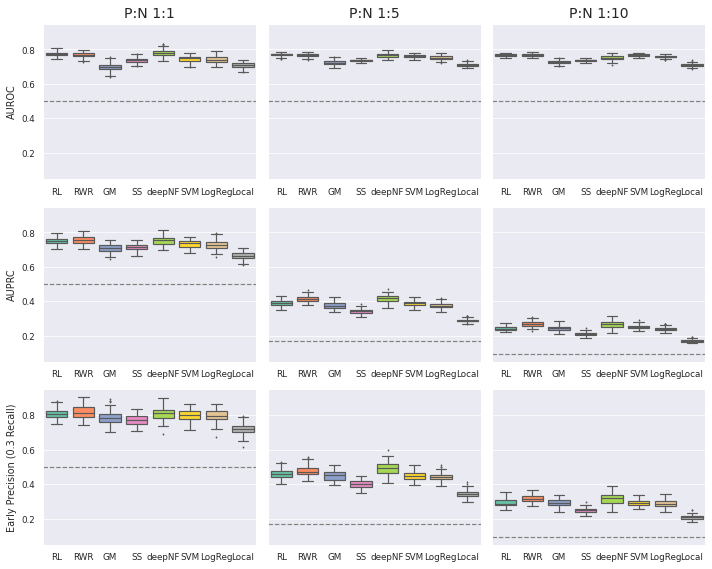

In [127]:
out_file = "outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf1-5-10.pdf"
sns.set_context('paper', font_scale=1.0)
f, axes = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(10,8))
df_all = pd.DataFrame()
for col_idx, curr_neg_factor in enumerate([1, 5, 10]):
    df, df2 = load_alg_results(neg_factor=curr_neg_factor)
    df2['neg_factor'] = curr_neg_factor
#     df_all = pd.concat([df_all, df])
    df_all = pd.concat([df_all, df2])
    print(df2.head())
    # for i, (ax, (measure, curr_df)) in enumerate(zip(axes, df2.groupby('measure'))):
    for row_idx, measure in enumerate(measures):
        print(measure)
        curr_df = df2[df2['measure'] == measure]
    #     print(curr_df.head())
        ax = axes[row_idx][col_idx]
        curr_df['P:N Ratio'] = "1:" + curr_df['neg_factor'].astype(str)
        sns.boxplot(x='Algorithm', y='value', data=curr_df, saturation=1.0,
    #                     hue='P:N Ratio', 
                         fliersize=1, ax=ax, palette="Set2")
        if row_idx == 0:
            ax.set_title(f"P:N 1:{curr_neg_factor}", fontsize=14)
        if col_idx == 0:
            ax.set_ylabel(measure)
        else:
            ax.set_ylabel("")

        ax.set_ylim(0.05,0.95)
        ax.set_xlabel("")
        if measure != "AUROC":
            rand_pred = 1 / float(1 + curr_neg_factor)
        else:
            rand_pred = 0.5
        ax.axhline(rand_pred, color="gray", linestyle="--")

plt.tight_layout()
print(out_file)
plt.savefig(out_file)
plt.savefig(out_file.replace('.pdf','.svg'))

In [128]:
df_all.head(2)

,Algorithm,plot_exp_name,neg_factor,measure,value,exp_name
0,RL,STRING,1,AUROC,0.7915,AUROC P:N 1:1
1,RL,STRING,1,AUROC,0.7770,AUROC P:N 1:1


In [130]:
# also write the medians to a file(?)
df_med = df_all.groupby(['Algorithm', 'exp_name'])['value'].median().unstack()

cols = df_med.columns
new_cols = [c for nf in [1, 5, 10] for c in cols if c.endswith(f'1:{nf}')]
print(new_cols)
df_med = df_med[new_cols]
df_med.to_csv(out_file.replace('.pdf', '-medians.tsv'))

['AUPRC P:N 1:1', 'AUROC P:N 1:1', 'Early Precision (0.3 Recall) P:N 1:1', 'AUPRC P:N 1:5', 'AUROC P:N 1:5', 'Early Precision (0.3 Recall) P:N 1:5', 'AUPRC P:N 1:10', 'AUROC P:N 1:10', 'Early Precision (0.3 Recall) P:N 1:10']


### Plot a single P:N ration (neg_factor=1)


  Algorithm plot_exp_name  neg_factor measure   value        exp_name
0        RL        STRING          10   AUROC  0.7719  AUROC P:N 1:10
1        RL        STRING          10   AUROC  0.7749  AUROC P:N 1:10
2        RL        STRING          10   AUROC  0.7681  AUROC P:N 1:10
3        RL        STRING          10   AUROC  0.7781  AUROC P:N 1:10
4        RL        STRING          10   AUROC  0.7735  AUROC P:N 1:10
    Algorithm plot_exp_name  neg_factor measure   value        exp_name
800        RL        STRING          10   AUPRC  0.2469  AUPRC P:N 1:10
801        RL        STRING          10   AUPRC  0.2373  AUPRC P:N 1:10
802        RL        STRING          10   AUPRC  0.2447  AUPRC P:N 1:10
803        RL        STRING          10   AUPRC  0.2615  AUPRC P:N 1:10
804        RL        STRING          10   AUPRC  0.2509  AUPRC P:N 1:10
     Algorithm plot_exp_name  neg_factor                       measure  \
1600        RL        STRING          10  Early Precision (0.3 Recall)   


/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/data/jeff-law/tools/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

outputs/viz/stringv11/400/2020-03-sarscov2-human-ppi-ace2/auroc-auprc-epr-box-nf10.pdf


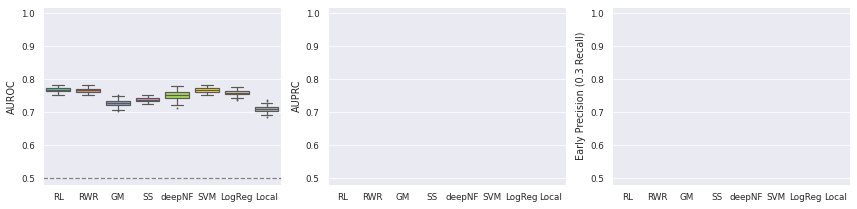

In [24]:
sns.set_context('paper', font_scale=1.0)
f, axes = plt.subplots(ncols=len(df2['measure'].unique()), figsize=(12,3))
# for i, (ax, (measure, curr_df)) in enumerate(zip(axes, df2.groupby('measure'))):
for i, (ax, measure) in enumerate(zip(axes, measures)):
    curr_df = df2[df2['measure'] == measure]
    print(curr_df.head())
    curr_df['P:N Ratio'] = "1:" + curr_df['neg_factor'].astype(str)
#     print(curr_df[(curr_df['Algorithm'] == 'GM+') & (curr_df['neg_factor'] == 1)].median())
#     print(triple_colors[i*3:(i+1)*3])
    ax = sns.boxplot(x='Algorithm', y='value', data=curr_df, saturation=1.0,
#                     hue='P:N Ratio', 
                     fliersize=1, ax=ax, palette="Set2")#palette=triple_colors[i*3:(i+1)*3], ax=ax)
#     ax = sns.barplot(x='Algorithm', y='value', data=curr_df, saturation=1,
#                 hue='neg_factor', ax=ax, palette="Set2")#palette=triple_colors[i*3:(i+1)*3], ax=ax)
    
#     ax.set_title(measure)
    ax.set_ylabel(measure)
    ax.set_ylim(0.48,1.02)
    ax.set_xlabel("")
    if measure != "AUROC":
        rand_pred = 1 / float(1 + neg_factor)
    else:
        rand_pred = 0.5
    ax.axhline(rand_pred, color="gray", linestyle="--")

plt.tight_layout()
print(out_file)
plt.savefig(out_file)
plt.savefig(out_file.replace('.pdf','.svg'))

In [111]:
df_all.head()

,Algorithm,plot_exp_name,neg_factor,measure,value,exp_name
0,RL,STRING,1,AUROC,0.7915,AUROC P:N 1:1
1,RL,STRING,1,AUROC,0.7770,AUROC P:N 1:1
2,RL,STRING,1,AUROC,0.7789,AUROC P:N 1:1
3,RL,STRING,1,AUROC,0.7803,AUROC P:N 1:1
4,RL,STRING,1,AUROC,0.7690,AUROC P:N 1:1


## Check for Statistically-Significant Differences 

In [124]:
# now compare the statistical significance
from scipy import stats
for measure in df_all['measure'].unique():
    for nf, df in df_all.groupby('neg_factor'):
        stat, pval = stats.kruskal(*[df_alg[df_alg['measure'] == measure]['value'] for alg, df_alg in df.groupby('Algorithm')])
        print(measure, nf, pval)

AUROC 1 3.5217959672257283e-122
AUROC 5 3.847229513195645e-130
AUROC 10 1.590538725375206e-135
AUPRC 1 1.0366527745320375e-93
AUPRC 5 1.9438148959086773e-122
AUPRC 10 6.528568290557148e-119
Early Precision (0.3 Recall) 1 7.62285962042876e-60
Early Precision (0.3 Recall) 5 8.462209657620317e-105
Early Precision (0.3 Recall) 10 1.4710718595831157e-104


In [159]:
order = ['RL', 'RWR', 'deepNF', 'SVM', 'LogReg', 'GM', 'SS', 'Local']

In [134]:
df_nf['measure'].unique()

array(['AUROC', 'AUPRC', 'Early Precision (0.3 Recall)'], dtype=object)

RWR RL AUROC 1 1
RWR RL AUPRC 1 1
RWR RL Early Precision (0.3 Recall) 1 1
RWR RL AUROC 5 1
RWR RL AUPRC 5 2.0155801096694048e-12
RWR RL Early Precision (0.3 Recall) 5 0.0061375329524682365
RWR RL AUROC 10 1
RWR RL AUPRC 10 4.08451827161171e-22
RWR RL Early Precision (0.3 Recall) 10 8.467684696126947e-09
outputs/viz/cv-stat-sig-nf1-5-10-log.pdf


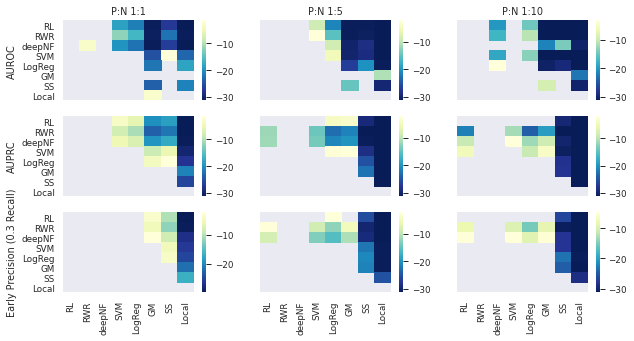

In [160]:
# Now perform pairwise comparisons between the algorithms
f, axes = plt.subplots(ncols=3, nrows=3, sharey=True, sharex=True, figsize=(10, 5))

df3 = pd.DataFrame()
for col_idx, (nf, df_nf) in enumerate(df_all.groupby('neg_factor')):
    for row_idx, measure in enumerate(df_nf['measure'].unique()):
#         print(i,j)
        ax = axes[row_idx][col_idx]
#         print("")
#         print(measure.upper())
    #     for i, (alg1, df_alg1) in enumerate(df_all.groupby('Algorithm')):
    #         for j, (alg2, df_alg2) in enumerate(df_all.groupby('Algorithm')):
        comparisons = []
        for i, alg1 in enumerate(order):
            for j, alg2 in enumerate(order):
                if j == i:
                    continue
                df_alg1 = df_nf[df_nf['Algorithm'] == alg1]
                df_alg2 = df_nf[df_nf['Algorithm'] == alg2]
                a1 = df_alg1[df_alg1['measure'] == measure]['value']
                a2 = df_alg2[df_alg2['measure'] == measure]['value']

    #             if np.median(a1) < np.median(a2):
    #                 test, pval = stats.mannwhitneyu(a1, a2, alternative="less")
    #             else:
                test, pval = stats.mannwhitneyu(a1, a2, alternative="greater")
    #             print(alg1, alg2, pval)
                # correct by the # tests
                pval = min(1, pval* (64-8) * 9)
                comparisons.append([alg1, alg2, pval])
                if alg1 == 'RWR' and alg2 == 'RL':
                    print(alg1, alg2, measure, nf, pval)
        df = pd.DataFrame(comparisons)
        df.columns = ['alg1', 'alg2', 'pval']
        df.loc[df["pval"]> 0.05, "pval"] = np.nan
    #     print(df.head())
        df2 = df.pivot('alg1', 'alg2', 'pval')
        df2 = df2[order]
        df2 = df2.T[order].T
        df2 = np.log10(df2)
#         df2.replace()
#         print(df2.head())
        df['measure'] = measure
        df['neg_factor'] = nf
        df3 = pd.concat([df3, df])

    #     df, ax = overlap_heatmap(df2, order, k, ax=ax, annot=annot)
    #     sns.heatmap(data=df2, cmap='YlGnBu', ax=ax)
        sns.heatmap(data=df2, cmap='YlGnBu_r', ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if col_idx == 0:
            ax.set_ylabel(measure)
        if row_idx == 0:
            ax.set_title(f'P:N 1:{nf}')

# plt.suptitle(f"P:N 1:{neg_factor}")
out_file = f'outputs/viz/cv-stat-sig-nf1-5-10-log.pdf'
print(out_file)
plt.savefig(out_file)
plt.savefig(out_file.replace('.pdf','.png'))
df3.to_csv(out_file.replace('.pdf','.tsv'), sep='\t')

In [152]:
# for measure, 
df3[(df3['alg2'] == 'RL') & (df3['pval'] < 1)]

,alg1,alg2,pval,measure,neg_factor
7,RWR,RL,0.018406,AUPRC,1
28,deepNF,RL,0.417262,AUPRC,1
7,RWR,RL,0.018406,AUPRC,5
28,deepNF,RL,0.417262,AUPRC,5
7,RWR,RL,0.018406,AUPRC,10
28,deepNF,RL,0.417262,AUPRC,10


In [84]:
df3[df3['measure'] == "eprec-rec0.3"]

,0,1,2,measure
0,RL,RWR,9.427974e-01,eprec-rec0.3
1,RL,GM,5.170496e-07,eprec-rec0.3
2,RL,SS,1.002870e-13,eprec-rec0.3
3,RL,deepNF,6.756474e-01,eprec-rec0.3
4,RL,SVM,5.102423e-02,eprec-rec0.3
5,RL,LogReg,1.374219e-02,eprec-rec0.3
6,RL,Local,5.417188e-33,eprec-rec0.3
7,RWR,RL,5.748417e-02,eprec-rec0.3
8,RWR,GM,1.638398e-08,eprec-rec0.3
9,RWR,SS,2.613671e-15,eprec-rec0.3
